In [16]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import shap
import matplotlib.pyplot as plt

c:\Users\Stuthemp\Desktop\hackatom\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Загрузка данных из CSV файла
data = pd.read_csv('../train_h.csv')

In [3]:
#Комбинируем браузер с версией браузера системы и кодируем этот столбец
label_encoder_browser_combined = LabelEncoder()

data['browser_combined'] = data['browser'] + ' ' + data['browser_version']
data['browser_combined_encoded'] = label_encoder_browser_combined.fit_transform(data['browser_combined'])

# Применяем его к колонке 'browser'
os_mapping = dict(zip(label_encoder_browser_combined.classes_, label_encoder_browser_combined.transform(label_encoder_browser_combined.classes_)))

In [4]:
#Комбинируем операционную систему с версией операционной системы и кодируем этот столбец
label_encoder_os_combined = LabelEncoder()

data['os_combined'] = data['os'] + ' ' + data['os_version']
data['os_combined_encoded'] = label_encoder_os_combined.fit_transform(data['os_combined'])

# Применяем его к колонке 'browser'
os_mapping = dict(zip(label_encoder_os_combined.classes_, label_encoder_os_combined.transform(label_encoder_os_combined.classes_)))

In [5]:
#Кодируем browser
label_encoder_browser = LabelEncoder()

data['browser_encoded'] = label_encoder_browser.fit_transform(data['browser'])

os_mapping = dict(zip(label_encoder_browser.classes_, label_encoder_browser.transform(label_encoder_browser.classes_)))

In [6]:
#Кодируем os
label_encoder_os = LabelEncoder()

data['os_encoded'] = label_encoder_os.fit_transform(data['os'])

os_mapping = dict(zip(label_encoder_os.classes_, label_encoder_os.transform(label_encoder_os.classes_)))

In [7]:
#Кодируем referer
label_encoder_refer = LabelEncoder()

data['referer_encoded'] = label_encoder_refer.fit_transform(data['referer'])

os_mapping = dict(zip(label_encoder_refer.classes_, label_encoder_refer.transform(label_encoder_refer.classes_)))

In [8]:
#Кодируем country_id
label_encoder_country_id = LabelEncoder()

data['country_id_encoded'] = label_encoder_country_id.fit_transform(data['country_id'])

os_mapping = dict(zip(label_encoder_country_id.classes_, label_encoder_country_id.transform(label_encoder_country_id.classes_)))

In [9]:
#Кодируем region_id
label_encoder_region_id = LabelEncoder()

data['region_id_encoded'] = label_encoder_region_id.fit_transform(data['region_id'])

os_mapping = dict(zip(label_encoder_region_id.classes_, label_encoder_region_id.transform(label_encoder_region_id.classes_)))

In [10]:
#Кодируем timezone_id
label_encoder_timezone_id = LabelEncoder()

data['timezone_id_encoded'] = label_encoder_timezone_id.fit_transform(data['timezone_id'])

os_mapping = dict(zip(label_encoder_timezone_id.classes_, label_encoder_timezone_id.transform(label_encoder_timezone_id.classes_)))

In [11]:
#Достаем фичи и таргеты
X = data.drop(columns=['target', 'user_id', 'browser_version', 'os_version', 'browser', 'os', 'browser_combined', 'os_combined', 'referer', 'country_id', 'region_id', 'timezone_id'], axis=1)
y = data['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=15, random_state=42)
model.fit(X_train, y_train)

# Создаем массивы для хранения значений точности
train_accuracy = []
test_accuracy = []

# Проходим через каждую итерацию построения деревьев
for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))



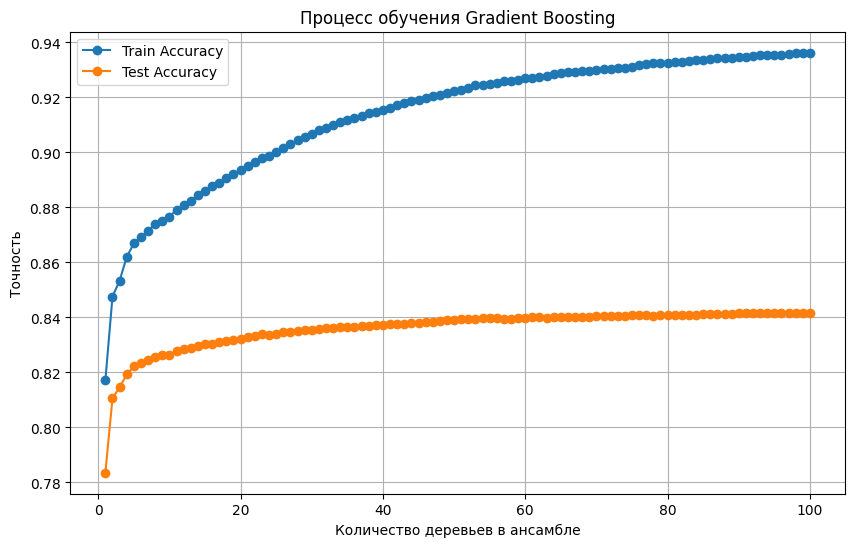

In [14]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_accuracy, label='Train Accuracy', marker='o')
plt.plot(range(1, 101), test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Количество деревьев в ансамбле')
plt.ylabel('Точность')
plt.title('Процесс обучения Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8416


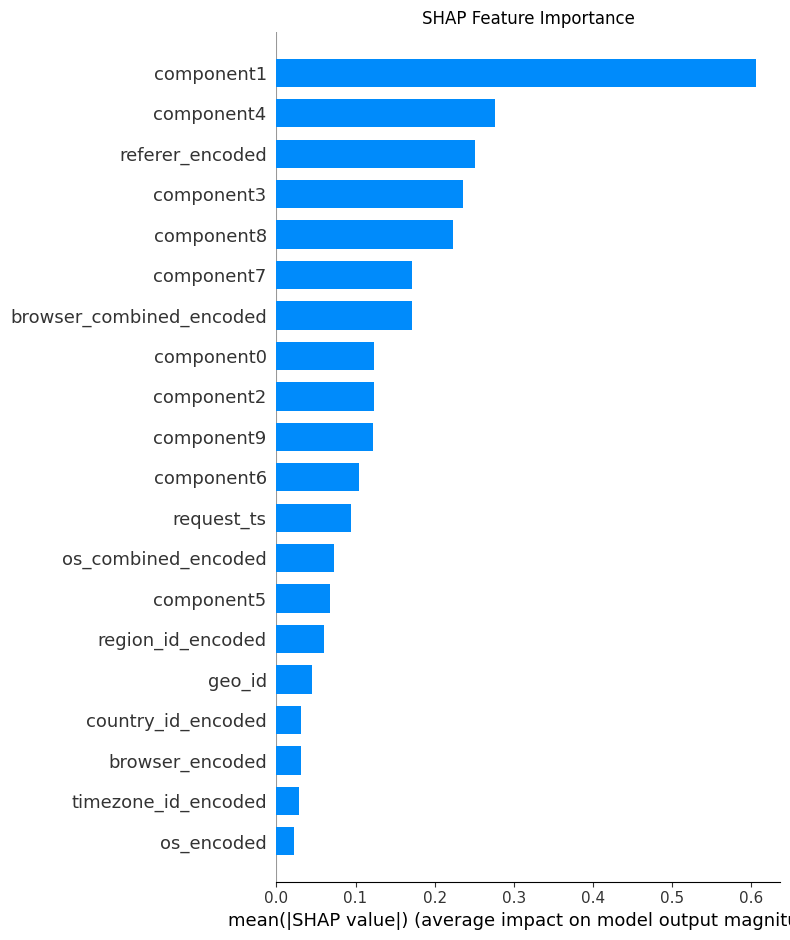

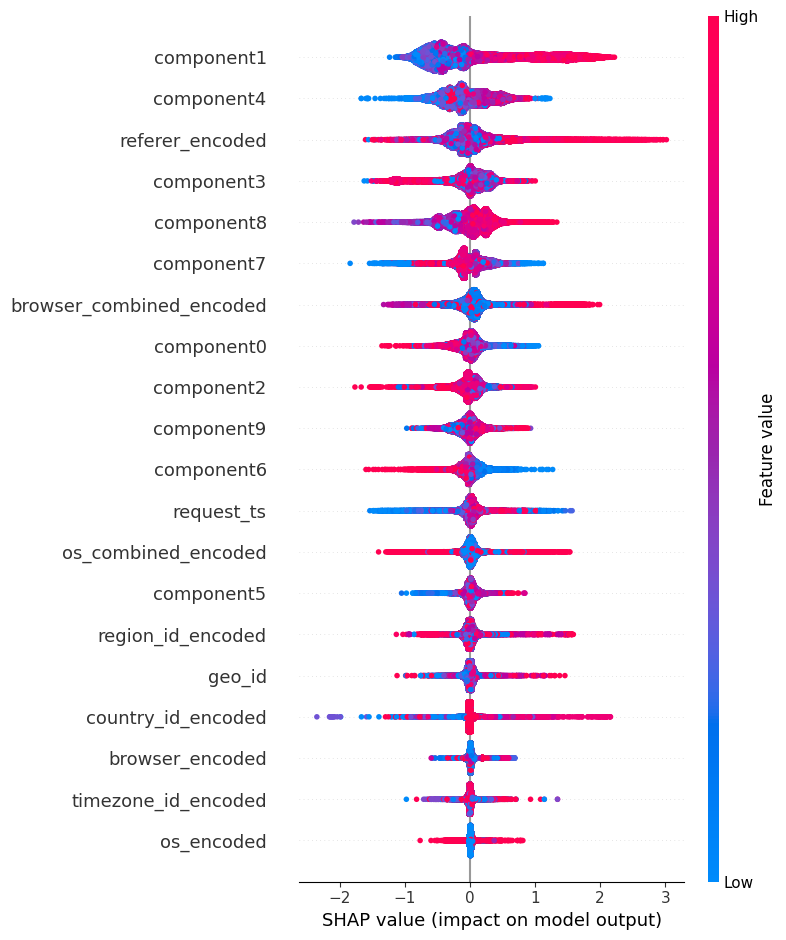

In [17]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Визуализируем важность признаков
plt.title("SHAP Feature Importance")
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# Альтернативная визуализация плотности распределения SHAP значений
shap.summary_plot(shap_values, X_test)